In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # For plots

In [32]:
def getdata(df):
    df['ACTV_START_TS'] = pd.to_datetime(df['ACTV_START_TS'])
    df['dayhour'] = df["ACTV_START_TS"].apply(lambda x: x.replace(minute=0, second=0, microsecond=0))
    time_line = pd.date_range(df["dayhour"].min(),df["dayhour"].max(),freq='H')
    time_line = time_line.to_series()
    ts = pd.DataFrame(time_line,columns = ["dayhour"])
    ts = ts.set_index("dayhour")
    ts = pd.merge(ts,df,how="left",on=["dayhour"])
    ts = ts.groupby(["dayhour"]).sum()
    ts = ts.reset_index(drop=True)
    ts["ACTV_DUR_MIN_QTY"] = ts["ACTV_DUR_MIN_QTY"].fillna(0)
    for i in range(len(ts)-1):
        if ts["ACTV_DUR_MIN_QTY"][i] > (ts["dayhour"][i+1]-ts["ACTV_START_TS"][i]).total_seconds()/60:
            temp = ((ts["dayhour"][i+1]-ts["ACTV_START_TS"][i]).total_seconds())/60
            ts["ACTV_DUR_MIN_QTY"][i+1] = ts["ACTV_DUR_MIN_QTY"][i]-temp
            ts["ACTV_DUR_MIN_QTY"][i] = temp
            ts["ACTV_START_TS"][i+1] = ts["dayhour"][i+1]
            
    ts = ts.drop(columns="ACTV_START_TS")
    ts = ts.set_index("dayhour")
    ts = ts.drop(ts.tail(1).index)
    return ts

In [33]:
df1 = pd.read_csv(r"C:\Users\V0V01S7\Desktop\driver_data_collection\girome8881@gmail.com.csv")
df2 = pd.read_csv(r"C:\Users\V0V01S7\Desktop\driver_data_collection\karepaujose1@gmail.com.csv")
df3 = pd.read_csv(r"C:\Users\V0V01S7\Desktop\driver_data_collection\kevin_miami_2015@outlook.com.csv")
df4 = pd.read_csv(r"C:\Users\V0V01S7\Desktop\driver_data_collection\luisrlo2001@gmail.com.csv")
df5 = pd.read_csv(r"C:\Users\V0V01S7\Desktop\driver_data_collection\robingamez11usa@gmail.com.csv")
df6 = pd.read_csv(r"C:\Users\V0V01S7\Desktop\driver_data_collection\benoitsaidel@yahoo.fr.csv")

In [34]:
ts1 = getdata(df1)
ts2 = getdata(df2)
ts3 = getdata(df3)
ts4 = getdata(df4)
ts5 = getdata(df5)
ts6 = getdata(df6)

C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_33212\3164584576.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts["ACTV_DUR_MIN_QTY"][i+1] = ts["ACTV_DUR_MIN_QTY"][i]-temp
C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_33212\3164584576.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts["ACTV_DUR_MIN_QTY"][i] = temp
C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_33212\3164584576.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<AxesSubplot:title={'center':'benoitsaidel'}, xlabel='dayhour'>

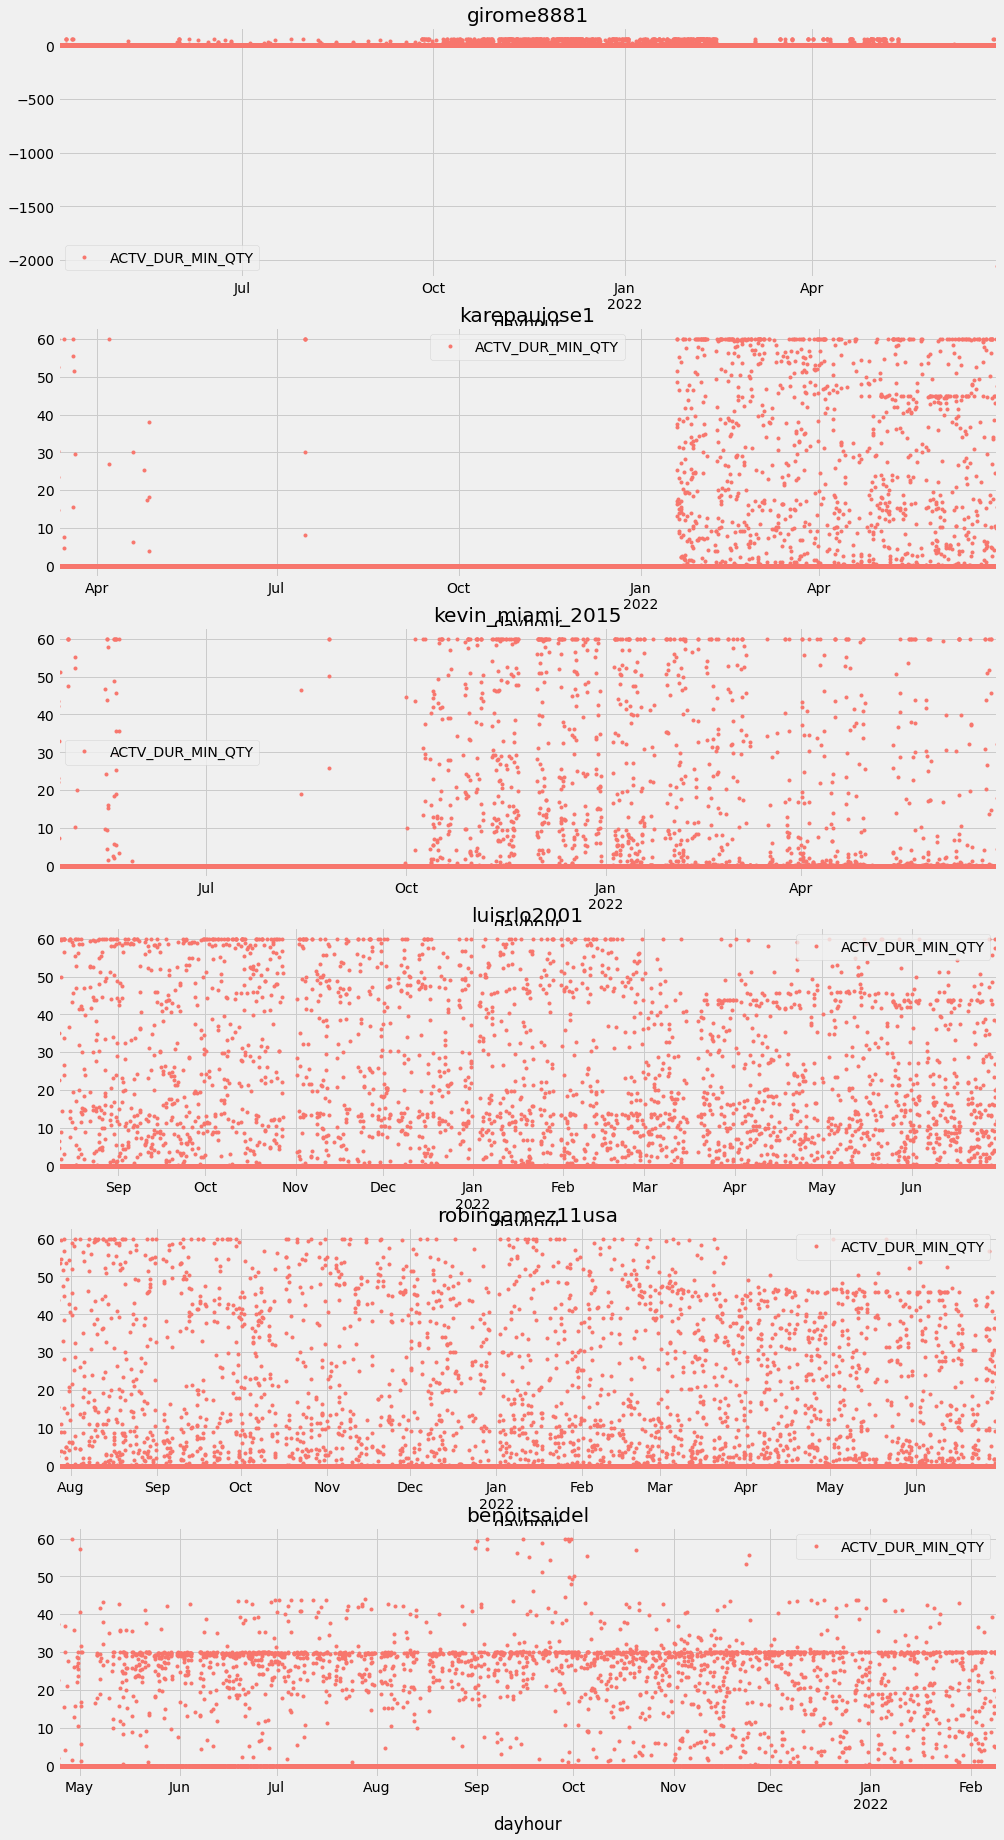

In [41]:
fig, axes = plt.subplots(nrows=6, ncols=1)

ts1.plot(style='.', figsize=(15,30), color=color_pal[0], title='girome8881',ax=axes[0])
ts2.plot(style='.', figsize=(15,30), color=color_pal[0], title='karepaujose1',ax=axes[1])
ts3.plot(style='.', figsize=(15,30), color=color_pal[0], title='kevin_miami_2015',ax=axes[2])
ts4.plot(style='.', figsize=(15,30), color=color_pal[0], title='luisrlo2001',ax=axes[3])
ts5.plot(style='.', figsize=(15,30), color=color_pal[0], title='robingamez11usa',ax=axes[4])
ts6.plot(style='.', figsize=(15,30), color=color_pal[0], title='benoitsaidel',ax=axes[5])

In [42]:
ts5.to_csv("Downloads/upload.csv")